<a href="https://colab.research.google.com/github/BacusLR/sales-predictions/blob/main/Bacus_sales_predictions_df(Project1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sales_Predictions Project 1

Lorincio R Bacus Jr

# Project 1 - Parts 1 & 2

### Part 1:

This is an overview of the steps you will need to complete for part one of the project. There are more detailed instructions for each section following the overview.

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!

### Part 2:

We will continue to work off of the GitHub repository we created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it.  As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

- Download the data using this link in the learn platform.
- Insert code below the heading "Loading Data"
  - Use Pandas to read the sales prediction data set into Google Colab.
  - Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
  - Explore the data - what do you need to do to clean this data? Clean it!
  - Be sure to address each of the following tasks:

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

### Data Dictionary

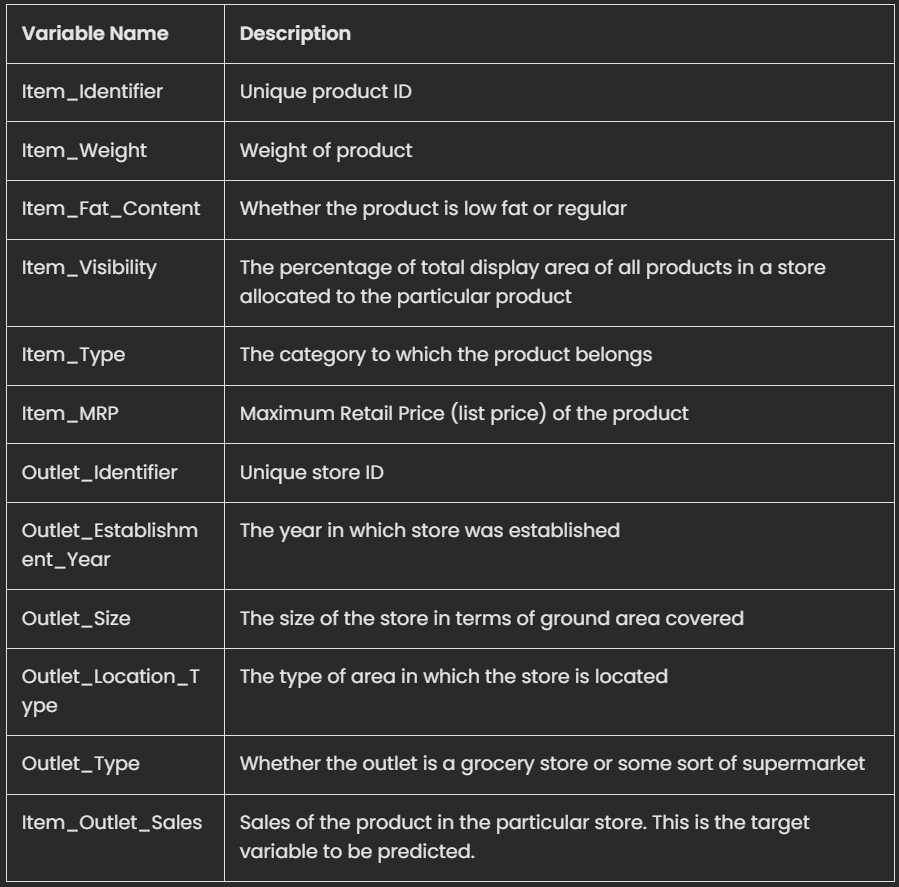

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Data

In [3]:
sales_df = pd.read_csv('/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/Sale_predictions unclean/sales_predictions_2023.csv')
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
sales_df2 = sales_df.copy()

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

How many rows/columns:

In [6]:
sales_df.shape

(8523, 12)

 - There are 8523 rows and 12 columns

Checking the data types:

In [7]:
sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Duplicated Data
Checking for duplicated data:

In [8]:
sales_df.duplicated().sum()

0

### Missing Values
Checking for missing values:

In [9]:
null_sums = sales_df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
type(null_sums)

pandas.core.series.Series

In [11]:
null_per = sales_df.isna().sum() / len(sales_df) * 100
null_per

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [12]:
null_per[null_per> 0]

Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64

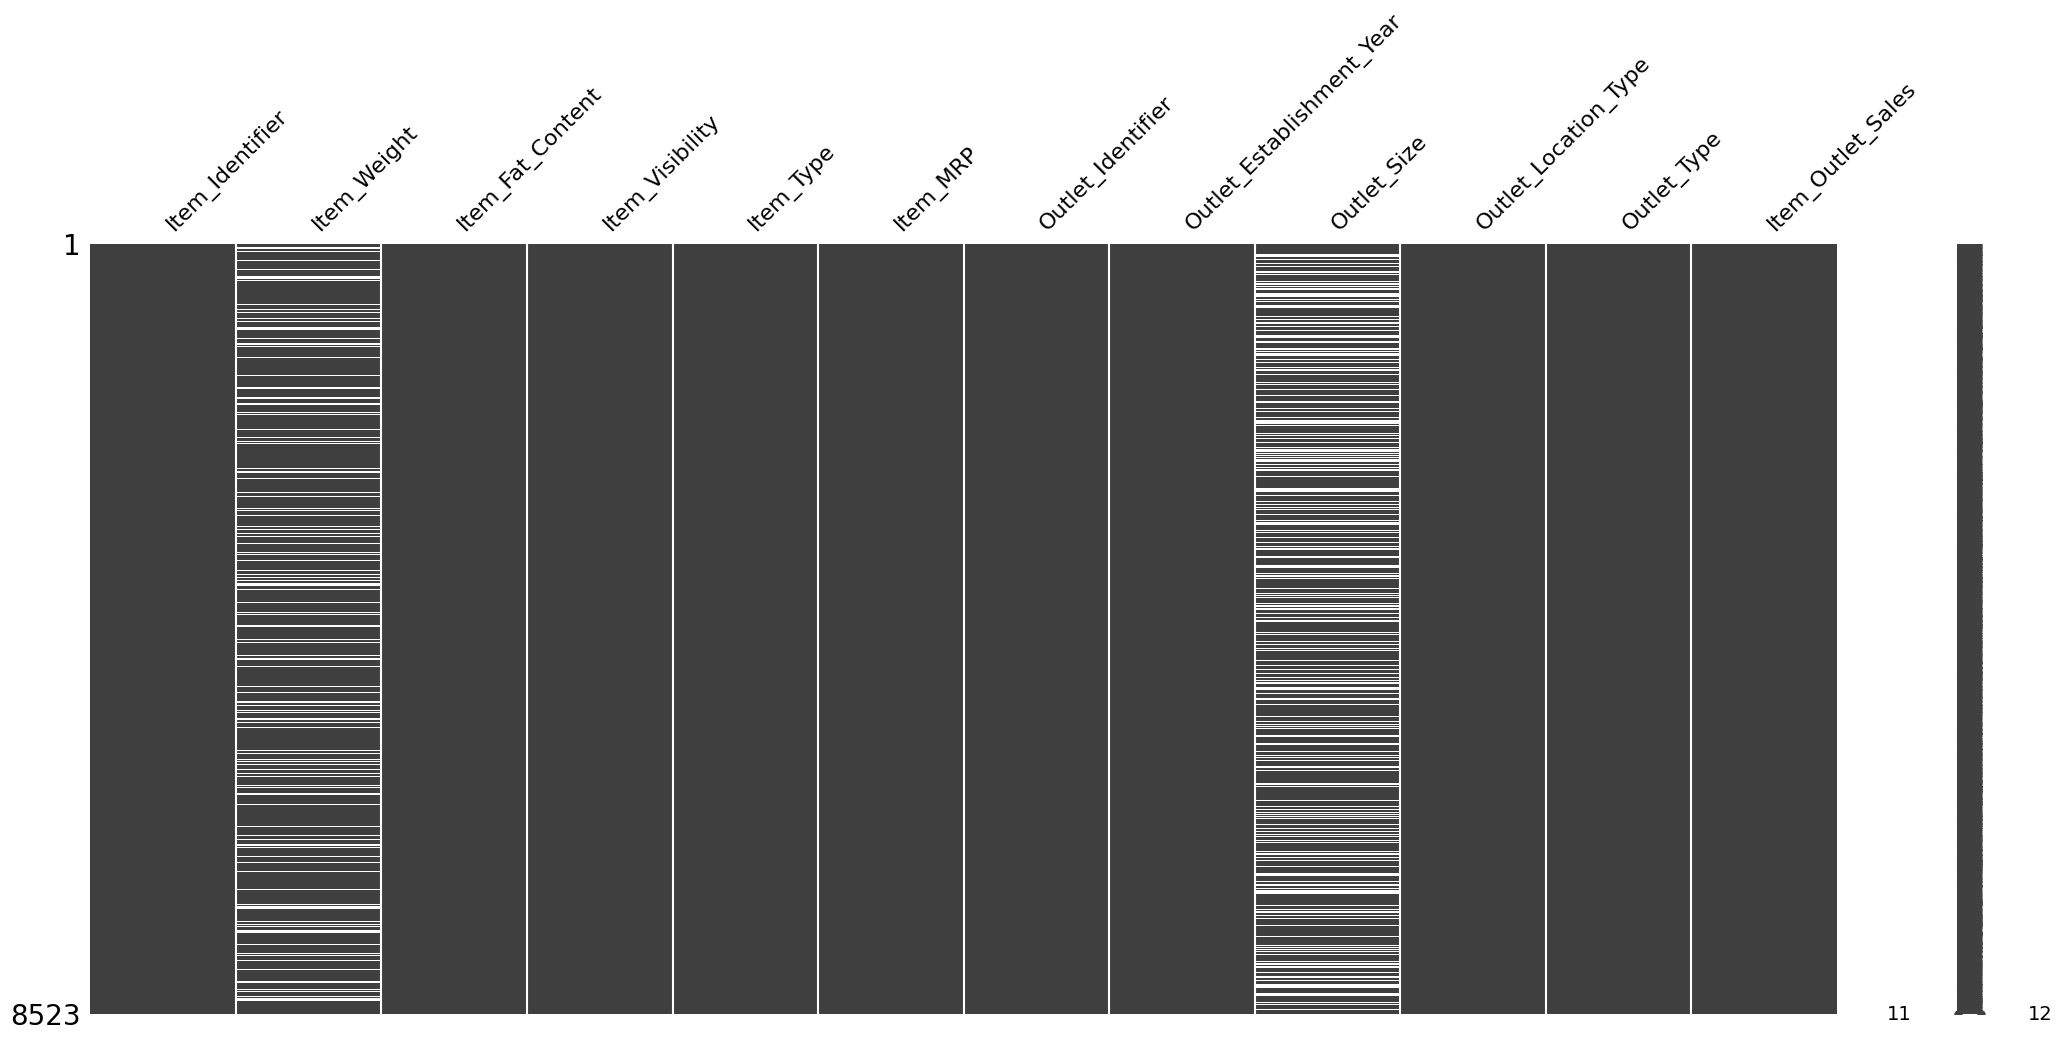

In [13]:
msno.matrix(sales_df);

 ### - Identifying % of missing data
 - This graph shows that Item_weight is missing 17.1% and Outlet_Size is missing 28.2% of there data.
 - Fill in the missing values with -1 and unknown so that the values will be filled in, but we will still be aware that those values are unknown.

Inspecting Item_Weight

In [14]:
null_weight = sales_df['Item_Weight'].isna()
null_weight

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [15]:
sales_df[null_weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [16]:
num_cols = sales_df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [17]:
sales_df[num_cols].isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [18]:
sales_df['Item_Weight'] = sales_df['Item_Weight'].fillna(-1)
sales_df[num_cols].isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

-Inspecting Outlet_Size

In [19]:
null_outlet = sales_df['Outlet_Size'].isna()
null_outlet

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [20]:
sales_df[null_outlet]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [21]:
cat_cols = sales_df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [22]:
sales_df[cat_cols].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [23]:
sales_df['Item_Weight'] = sales_df['Item_Weight'].fillna('UNKNOWN')
sales_df[num_cols].isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [24]:
sales_df[cat_cols] = sales_df[cat_cols].fillna('UNKNOWN')

In [25]:
sales_df['Outlet_Size'].value_counts()

Medium     2793
UNKNOWN    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64



---



In [26]:
sales_df.describe(include= 'number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [27]:
sales_df.describe(include= 'object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


### Fixing Data Types

- We will now address the data types and make sure that they match the data dictionary.

In [28]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Inspecting Categorical Columns & Addressing Inconsistent Values

In [29]:
sales_df[num_cols].nunique()

Item_Weight                   416
Item_Visibility              7880
Item_MRP                     5938
Outlet_Establishment_Year       9
Item_Outlet_Sales            3493
dtype: int64

In [30]:
num_val = sales_df['Item_Outlet_Sales'].value_counts()
num_val

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [31]:
sales_df[cat_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [32]:
val_cat = sales_df['Item_Identifier'].value_counts()
val_cat

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [33]:
sales_df['Item_Identifier'].describe()

count      8523
unique     1559
top       FDW13
freq         10
Name: Item_Identifier, dtype: object

In [34]:
uniq_item = sales_df['Item_Identifier'].nunique()
uniq_item

1559

In [35]:
sales_df.loc[1559, 'Item_Identifier']

'NCB43'

In [36]:
sales_df.loc[1092]

Item_Identifier                          NCB43
Item_Weight                               -1.0
Item_Fat_Content                       Low Fat
Item_Visibility                       0.099428
Item_Type                            Household
Item_MRP                              187.8898
Outlet_Identifier                       OUT027
Outlet_Establishment_Year                 1985
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                    7296.5022
Name: 1092, dtype: object

In [37]:
val_cat = sales_df['Item_Fat_Content'].value_counts()
val_cat

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [38]:
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                       'low fat':'Low Fat',
                                       'reg':'Regular'})


In [39]:
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Summary Statistics for Numeric Features

- We will now view use df.describe() to view the summary statistics for the numeric features.

In [40]:
sales_df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,10.48,0.07,140.99,1997.83,2181.29
std,6.72,0.05,62.28,8.37,1706.50
min,-1.00,0.00,31.29,1985.00,33.29
25%,6.65,0.03,93.83,1987.00,834.25
50%,11.00,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


# Project 1 - Part 3

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.


## Exploratory Visuals & Analysis

- For each numeric feature, we will plot the distribution and a boxplot.

### Column-by-Column EDA using a function (plus markdown interpretations for each)

In [41]:
sales_df[num_cols].nunique()

Item_Weight                   416
Item_Visibility              7880
Item_MRP                     5938
Outlet_Establishment_Year       9
Item_Outlet_Sales            3493
dtype: int64

In [42]:
num_cols = sales_df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [43]:
val_num = sales_df['Item_Weight'].value_counts()
val_num

-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [44]:
val_num = sales_df['Item_Visibility'].value_counts()
val_num

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [45]:
val_num = sales_df['Item_MRP'].value_counts()
val_num

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

In [46]:
val_num = sales_df['Outlet_Establishment_Year'].value_counts()
val_num

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [47]:
val_num = sales_df['Item_Outlet_Sales'].value_counts()
val_num

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [48]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

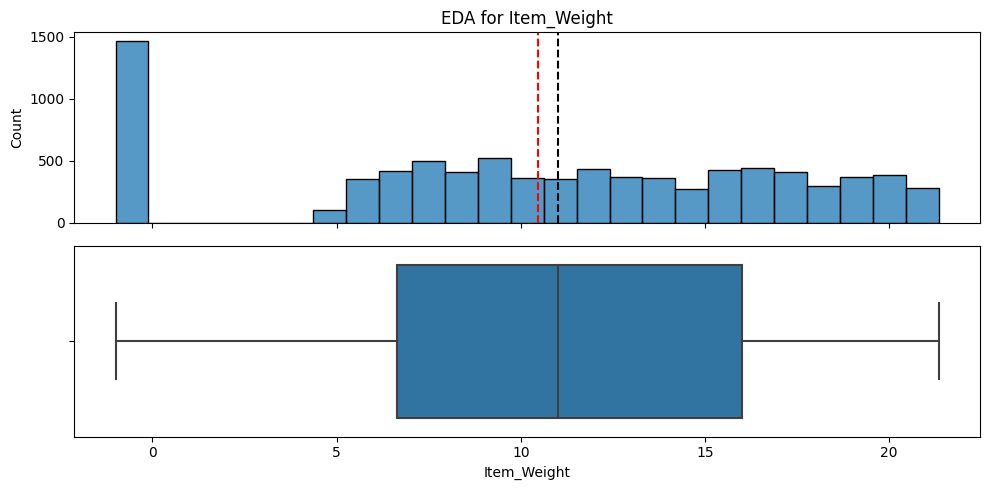

In [49]:
plot_numeric(sales_df,'Item_Weight')

- Here on the boxplot, you can clearly see that most items weigh close to 12 points

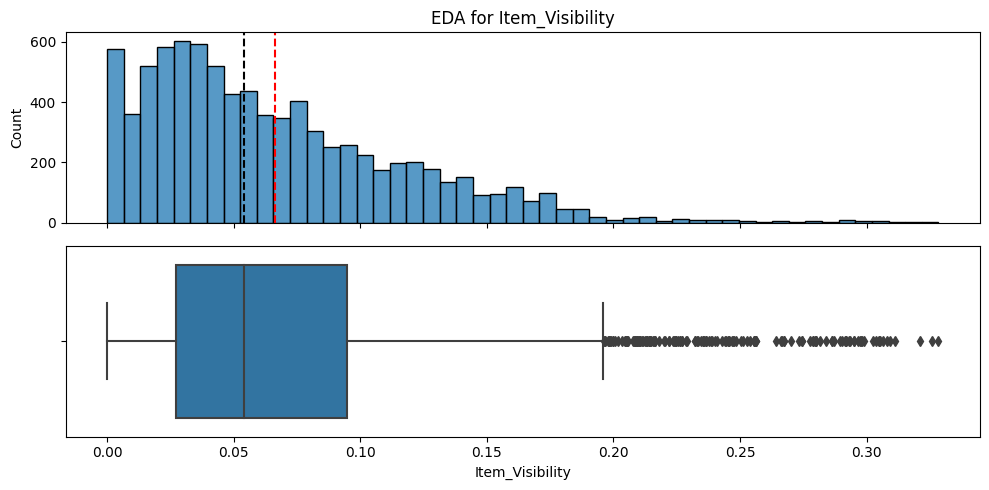

In [50]:
plot_numeric(sales_df,'Item_Visibility')

- You can clearly see a lot of outliers and most values fall close to 0.05/0.06

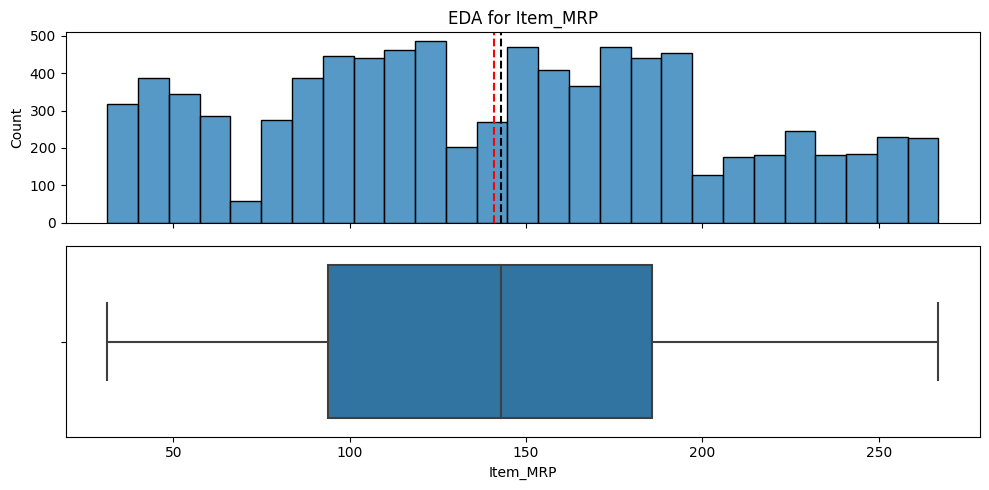

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [51]:
plot_numeric(sales_df,'Item_MRP')
val_num = sales_df['Item_MRP'].describe()
val_num

- The Maximum Retail Price average is $143.00


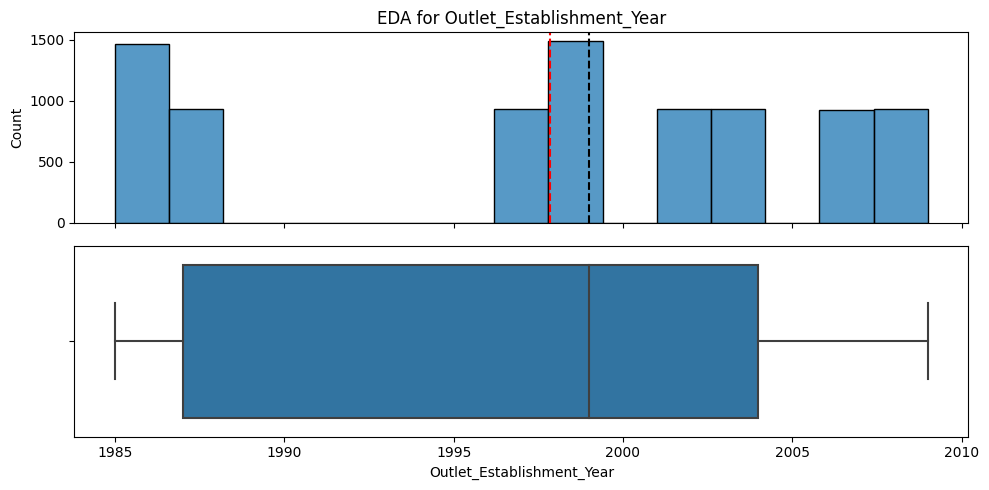

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [52]:
plot_numeric(sales_df,'Outlet_Establishment_Year')
val_num = sales_df['Outlet_Establishment_Year'].describe()
val_num

- The most outlets were established in 2009

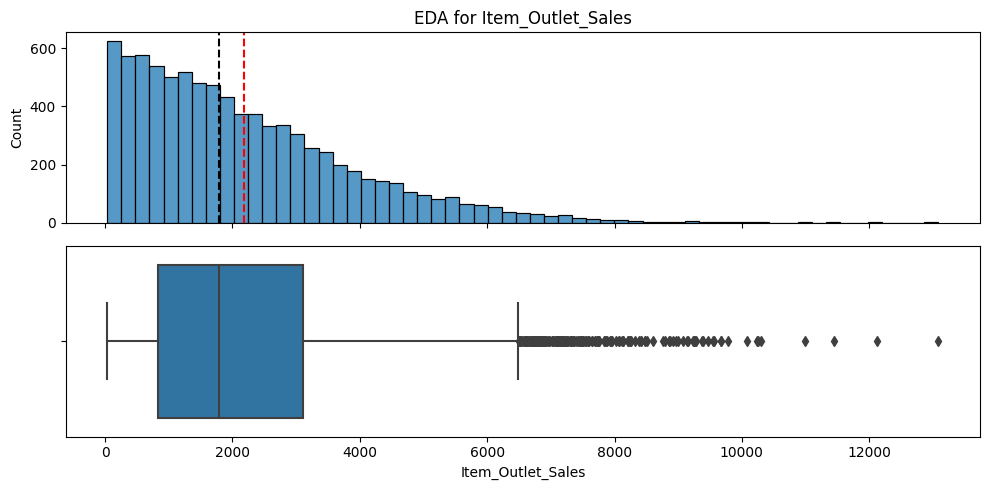

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [53]:
plot_numeric(sales_df,'Item_Outlet_Sales')
val_num = sales_df['Item_Outlet_Sales'].value_counts()
val_num

- The amount of $958 had 17 transactions



---



---



### Visualizing with Barplots
- We will view the categorical counts of all of the object type columns and visualize this information with a barplot.

In [54]:
cat_cols = sales_df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [55]:
sales_df[cat_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [56]:
val_cat = sales_df['Item_Identifier'].value_counts()
val_cat

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [57]:
val_cat = sales_df['Item_Fat_Content'].value_counts()
val_cat

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [58]:
val_cat = sales_df['Item_Type'].value_counts()
val_cat

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [59]:
val_cat = sales_df['Outlet_Identifier'].value_counts()
val_cat

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [60]:
val_cat = sales_df['Outlet_Size'].value_counts()
val_cat

Medium     2793
UNKNOWN    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [61]:
val_cat = sales_df['Outlet_Location_Type'].value_counts()
val_cat

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [62]:
val_cat = sales_df['Outlet_Type'].value_counts()
val_cat

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [63]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(30,10)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.

    counts = sales_df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 45)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 14, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 14, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 14, fontweight = 'bold')

    return fig,ax

count      8523
unique     1559
top       FDW13
freq         10
Name: Item_Identifier, dtype: object


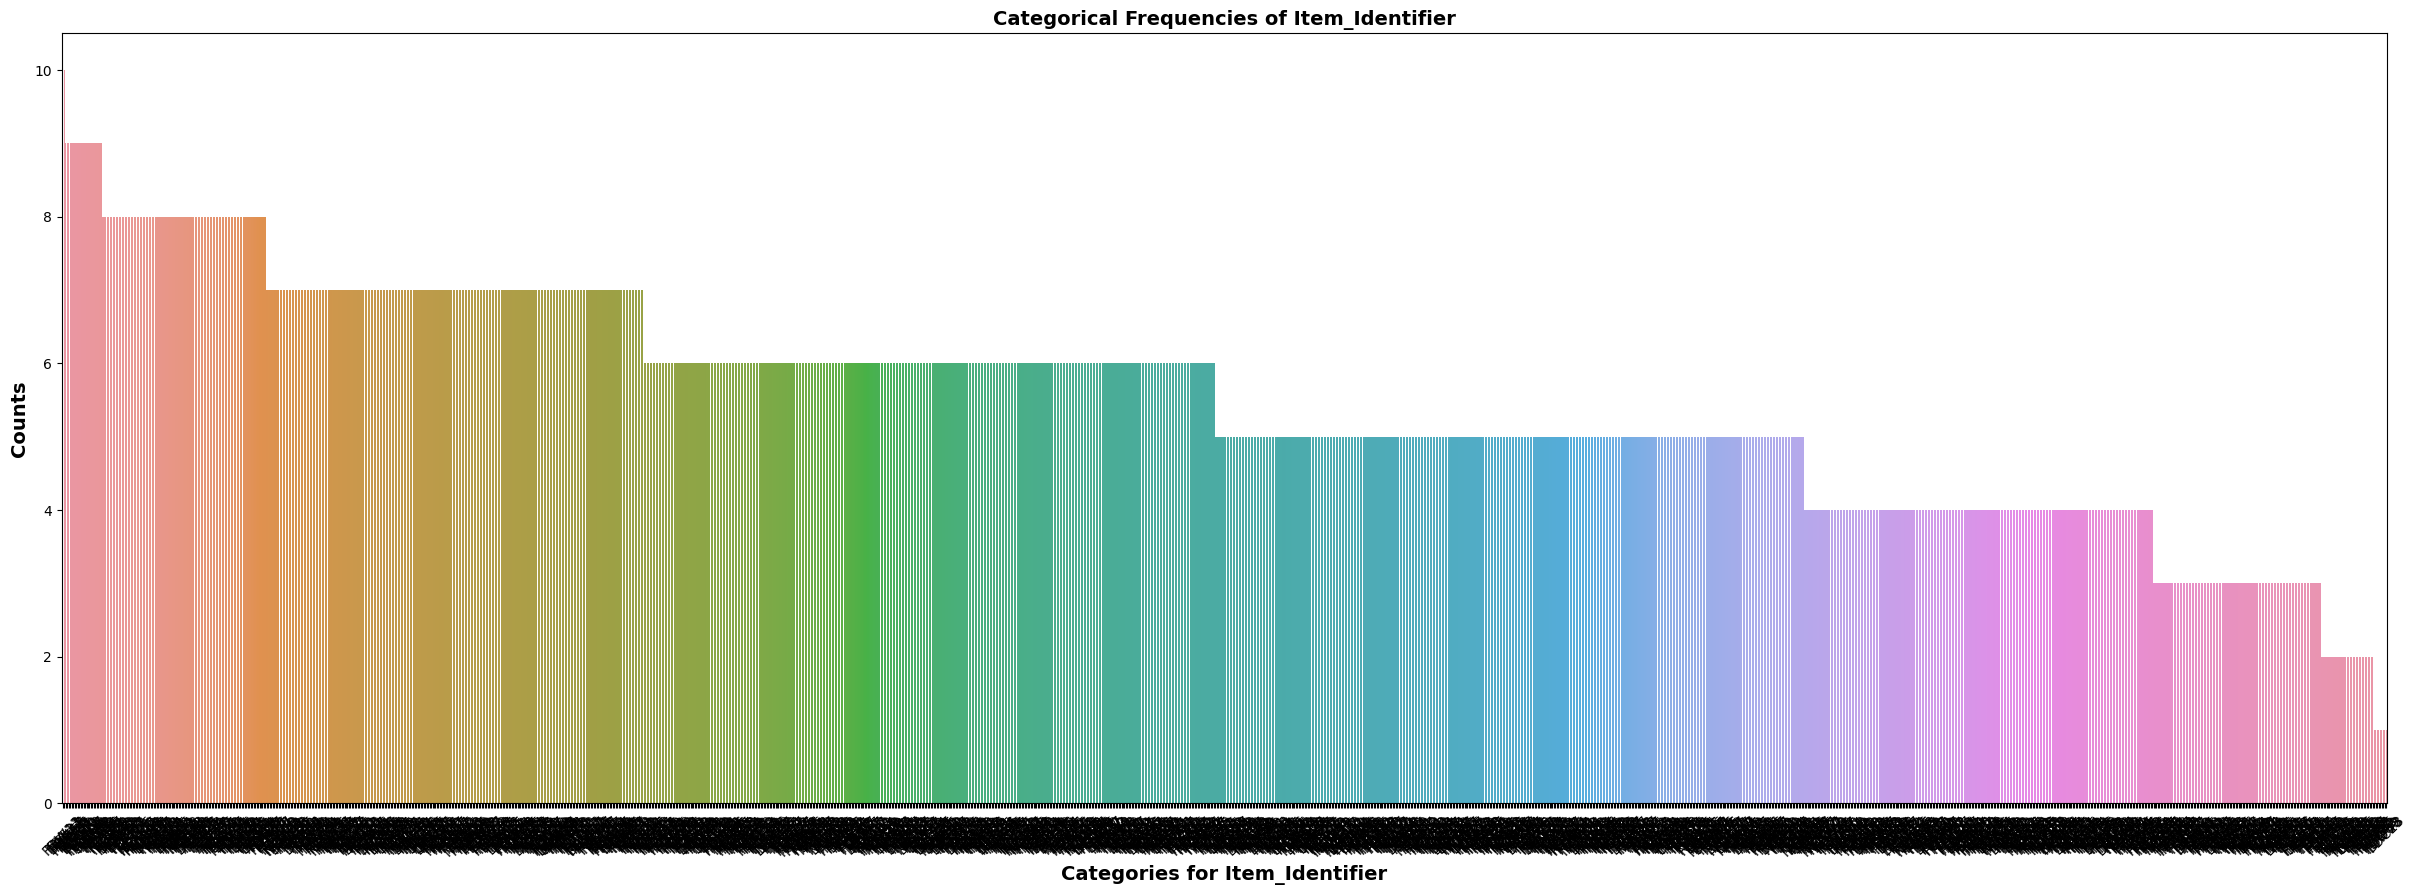

In [64]:
fig, ax = plot_bar(sales_df, 'Item_Identifier', 'Item_Identifier');
print(sales_df['Item_Identifier'].describe())

- Need to work on this one

count        8523
unique          2
top       Low Fat
freq         5517
Name: Item_Fat_Content, dtype: object


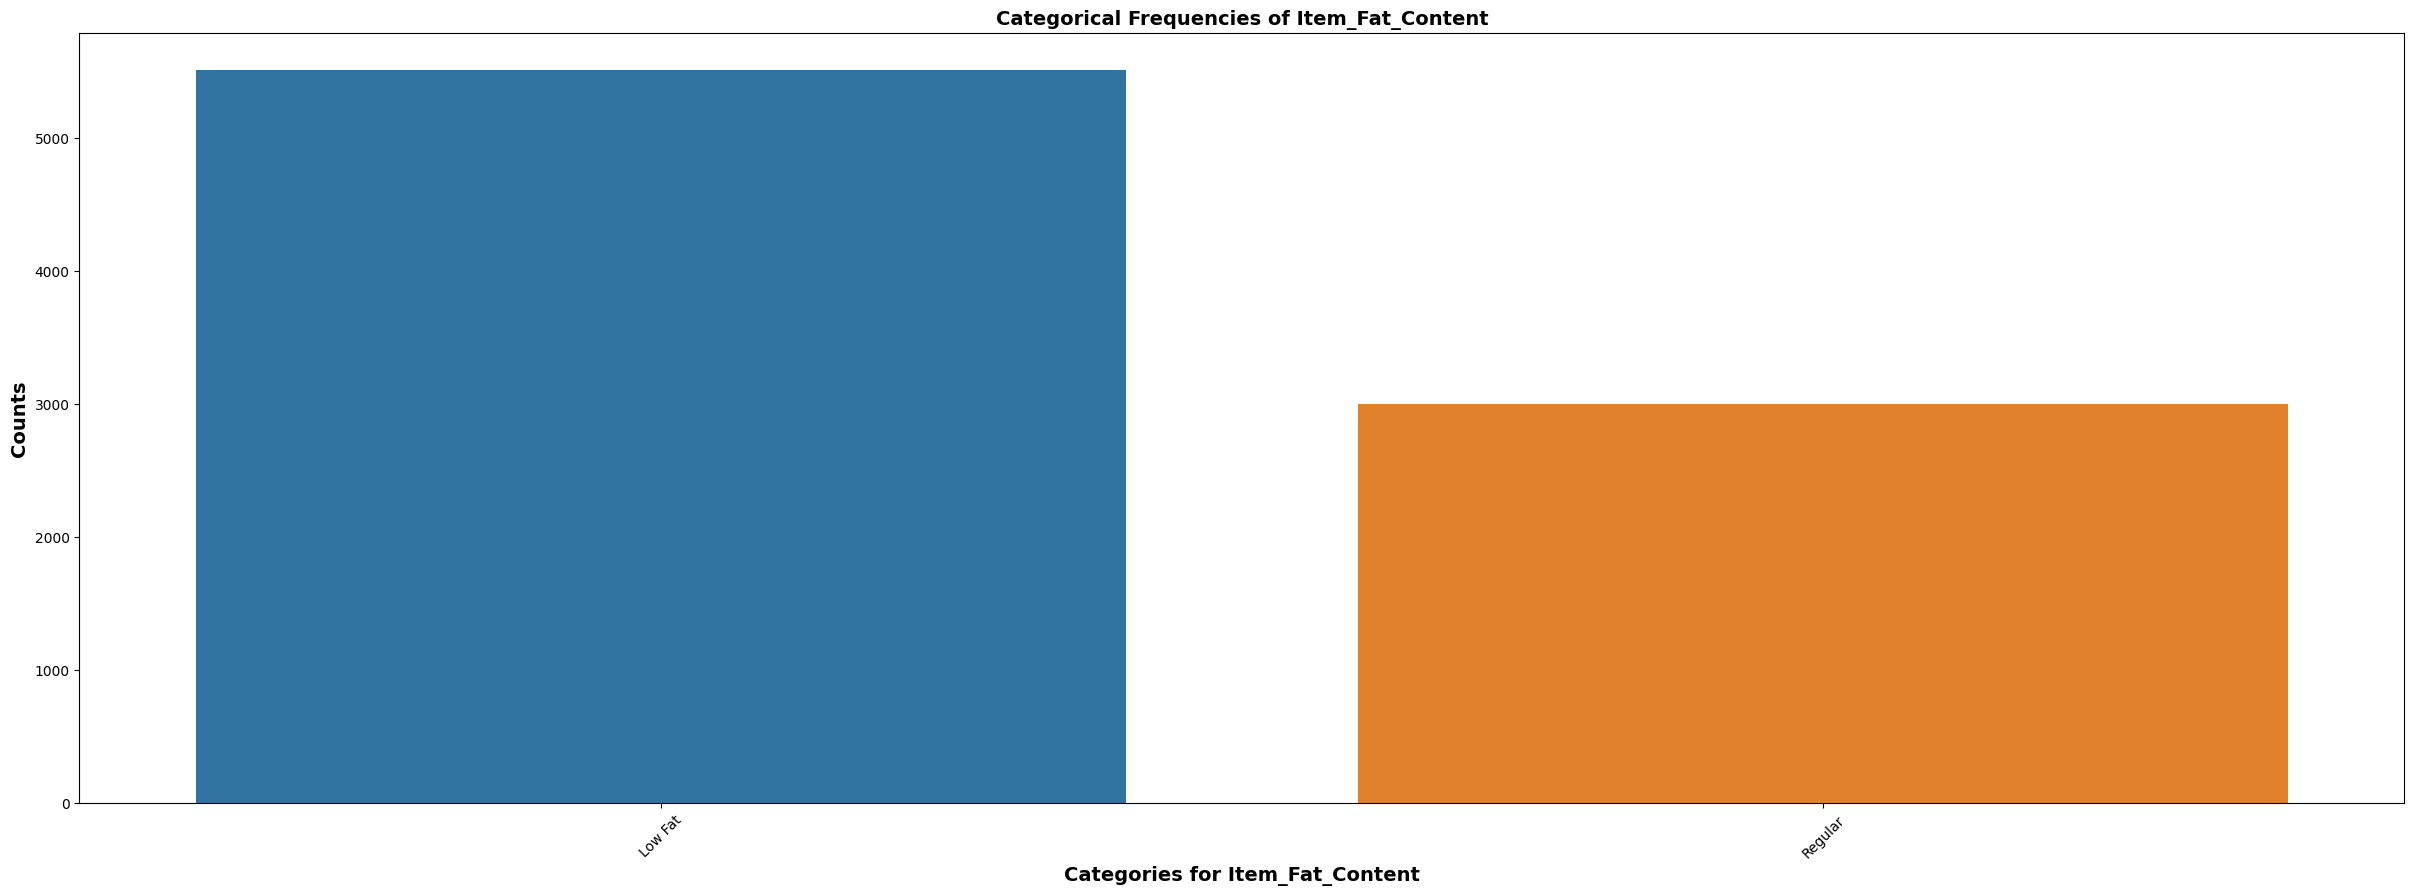

In [65]:
fig, ax = plot_bar(sales_df, 'Item_Fat_Content', 'Item_Fat_Content');
print(sales_df['Item_Fat_Content'].describe())

- Here we see that most of the companies, for this particular dataset, were in the US.

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


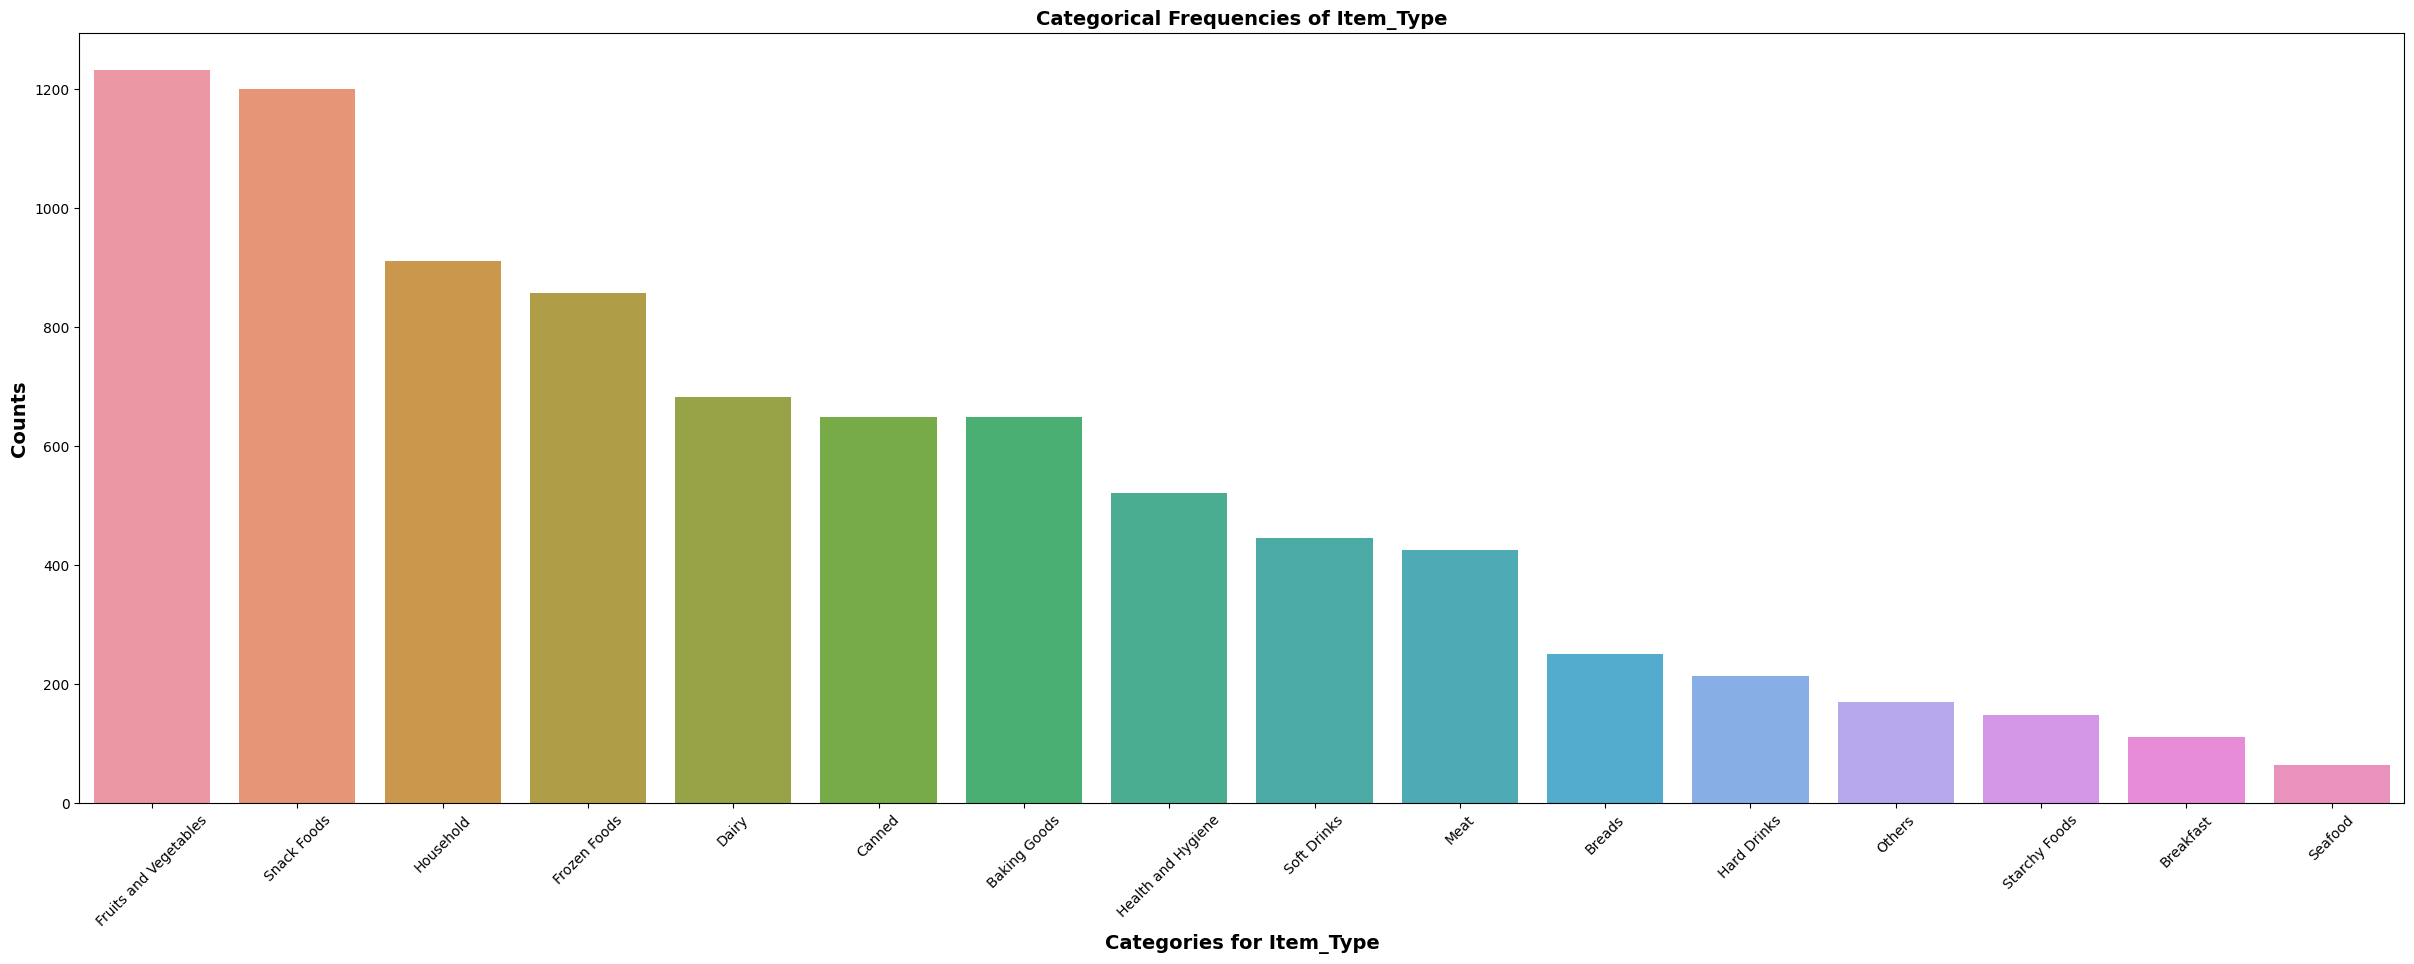

In [66]:
fig, ax = plot_bar(sales_df, 'Item_Type', 'Item_Type');
print(sales_df['Item_Type'].value_counts())

- Here we see that majority of the companies are medium sized companies.

### EDA for Correlated Features

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


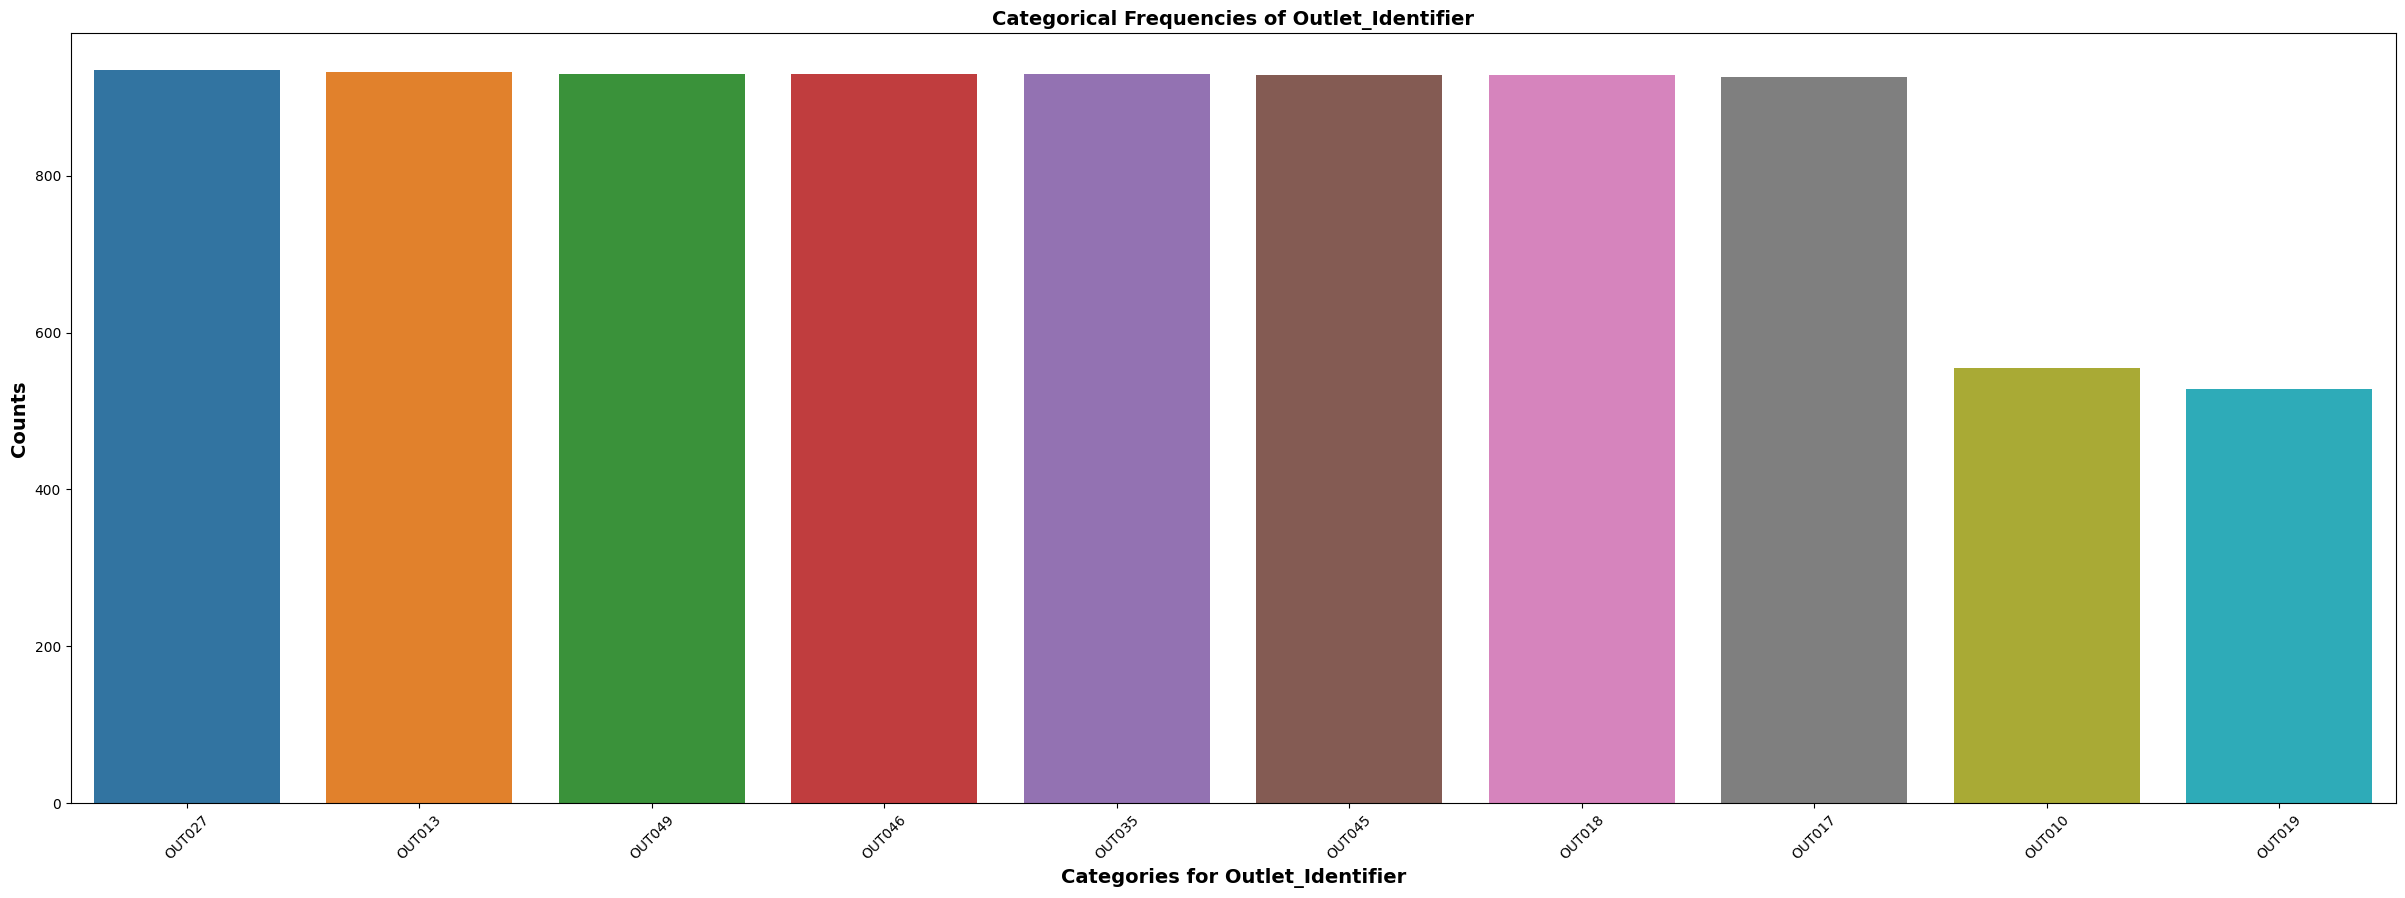

In [67]:
fig, ax = plot_bar(sales_df, 'Outlet_Identifier', 'Outlet_Identifier')
print(sales_df['Outlet_Identifier'].value_counts())

- Here we see that there were an increase of workers in 2022.

Medium     2793
UNKNOWN    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


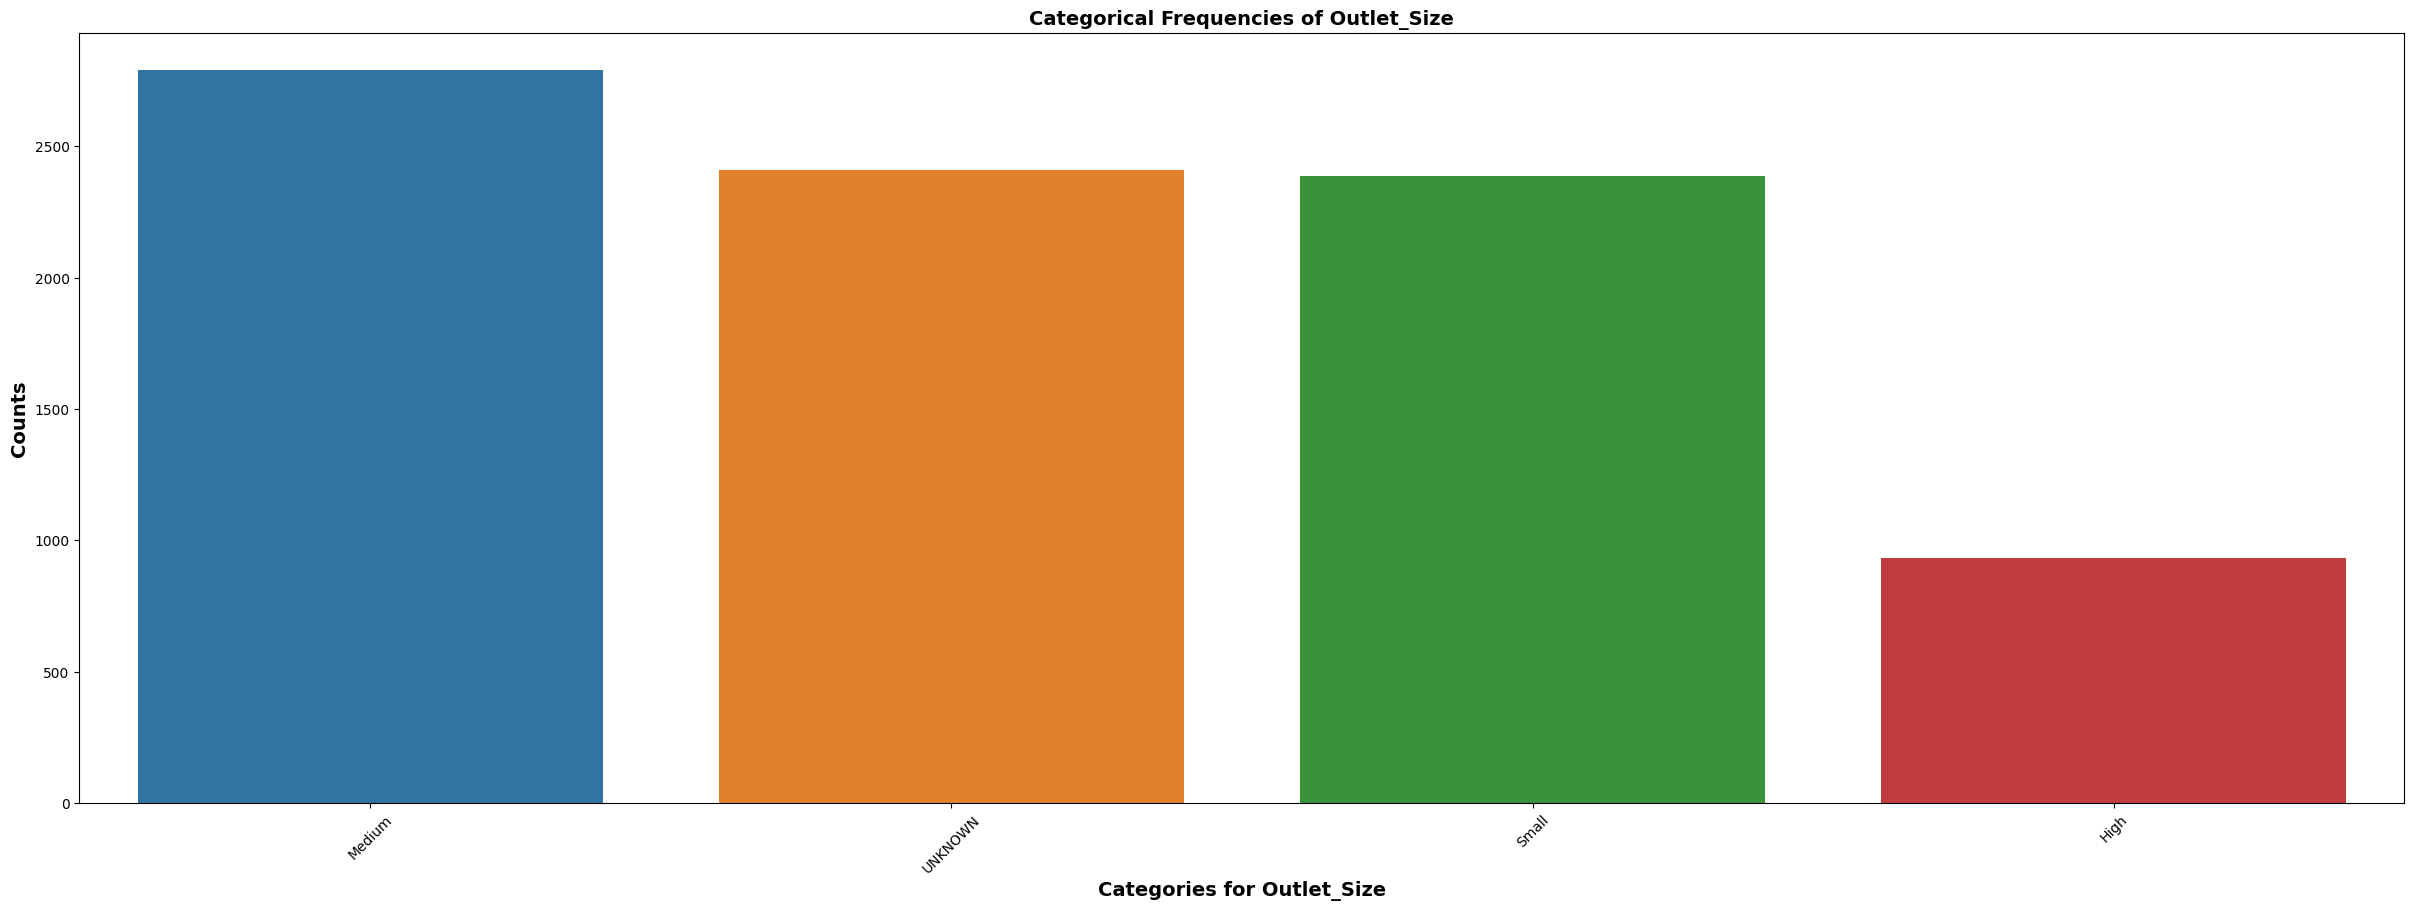

In [68]:
fig, ax = plot_bar(sales_df, 'Outlet_Size', 'Outlet_Size')
print(sales_df['Outlet_Size'].value_counts())

- There are definitely a greater number of workers that are 100% remote for this particular dataset.

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


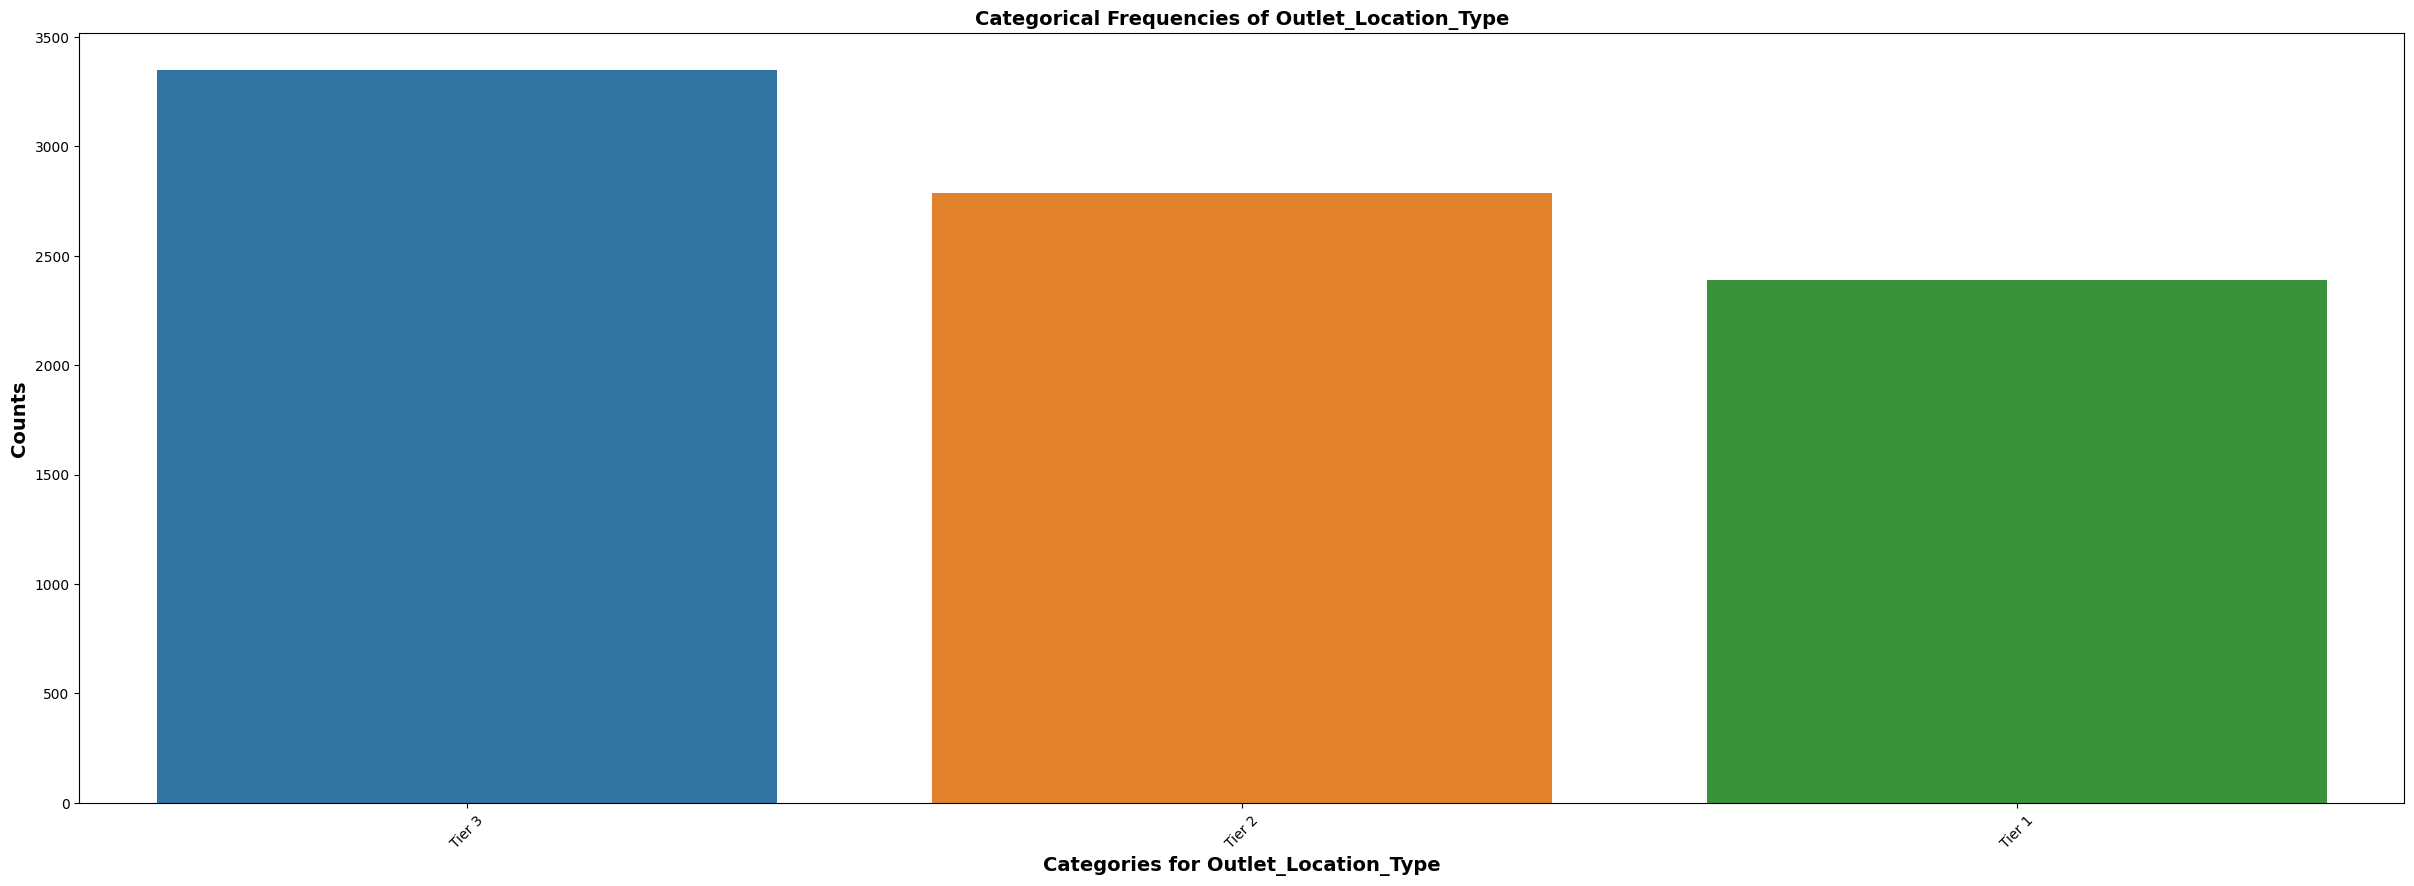

In [69]:
fig, ax = plot_bar(sales_df, 'Outlet_Location_Type', 'Outlet_Location_Type')
print(sales_df['Outlet_Location_Type'].value_counts())

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


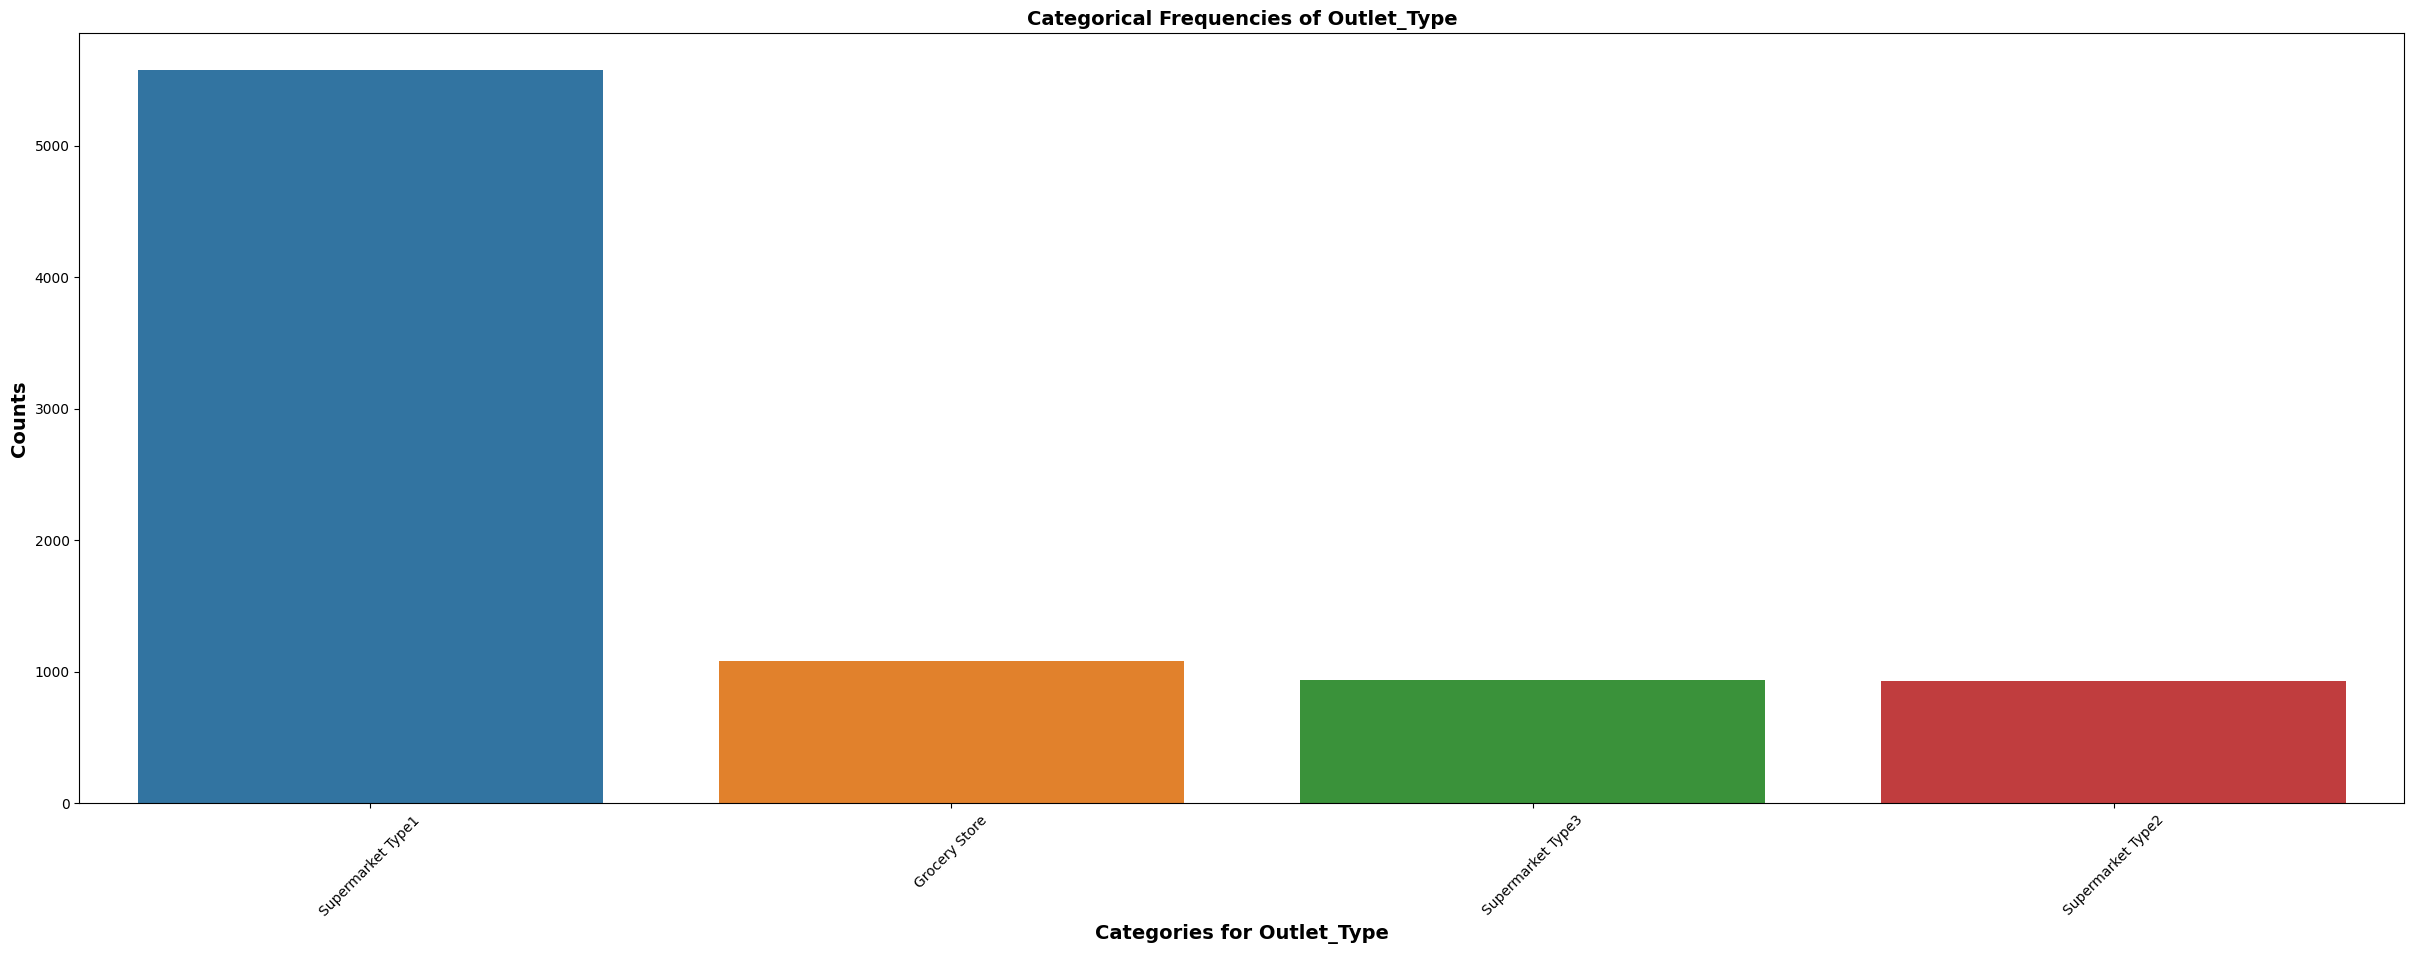

In [70]:
fig, ax = plot_bar(sales_df, 'Outlet_Type', 'Outlet_Type')
print(sales_df['Outlet_Type'].value_counts())

<ipython-input-71-b2688a26577c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales_df.corr(),annot=True,cmap='Blues');


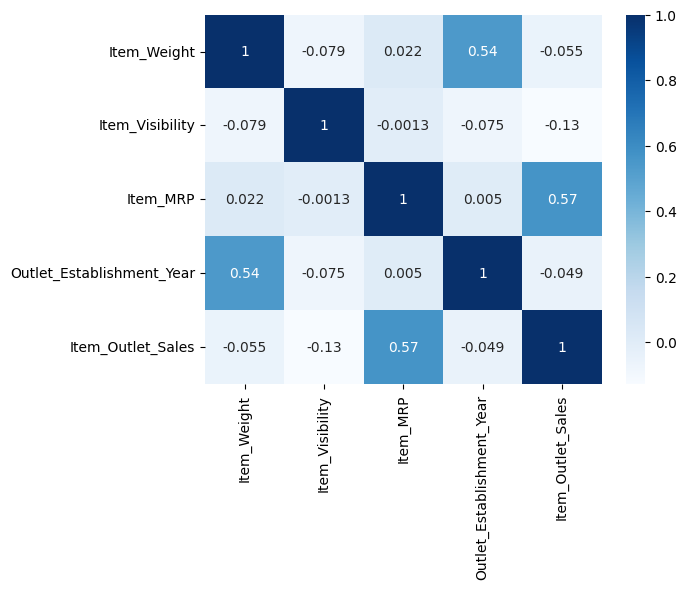

In [71]:
sns.heatmap(sales_df.corr(),annot=True,cmap='Blues');

- There aren't really any strong or even moderate correlations shown here.
- There is a weak postive correlation between the `salary_in_usd` and the `work_year`.
- All of the other correlations are negligible.

### Big-Picture EDA/ All Features At Once:

In [72]:
sns.pairplot(df);

NameError: ignored

- Here we can see that majority of these roles are 100% remote work ratio.
- We also can see that 2021 has the highest earned salaries when compared to the other years.
- Lastly, we can see that the 100% remote work ratio has the greatest salary values for salary in usd.


# Project 1 - Part 4

## Explanatory Visuals & Analysis

>For Part 4, our task is to build several data visualizations to help  stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

- We will build on our previous cleaning, exploration, and analysis.  
- Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
- Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

### Possible Questions to Answer:
  1. For each feature:

-  Add a new markdown header.
-  Paste the feature's definition from the data dictionary into a markdown cell.
-  Create a univariate visualization showing the distribution of values/categories.
-  You may use the EDA functions from the previous lessons or create your own visualizations.

**Answer the following questions from the Feature Inspection lesson in a markdown cell:**
-  What type of feature is it? (Categorical (nominal), ordinal, numeric)
-  How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
-  Is the feature constant or quasi-constant?
-  What is the cardinality? Is it high (>10)?
-  Would we know this feature before the target is determined?
-  Is there a business case/understanding reason to exclude based on our business case?

**Create a multivariate visualization plotting each feature vs. the target.**
- You may use the EDA functions from the previous lessons or create your own visualizations.​
**Answer the following questions from the Feature Inspection lesson in a Markdown cell:**
- Based on your business understanding, would you expect this feature to be a predictor of the target?
- Does this feature appear to be a predictor of the target?


Commit your work to GitHub.

In [ ]:
df.info()

#### 1. Which job titles earn the most and least money?

In [ ]:
means = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
means

In [ ]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='job_title', y = 'salary_in_usd', order = means.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Salary in USD vs. Job Title', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Job Title', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Salary in USD', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

#### 2. Which experience levels earn the most and least amount of money?

In [ ]:
means2 = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)
means2

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='experience_level', y = 'salary_in_usd', order = means2.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Salary in USD vs. Experience Level', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Experience Level', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Salary in USD', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

The top and bottom earning experience level and average salary is as follows:

- Top Earning Experience Level
  - Director Level: `$199,561.81`
- Bottom Earning Experience Level
  - Junior Level: `$62,049.60`

#### 3. How many roles work 100% remotely?

In [ ]:
df['remote_ratio'].value_counts()

In [ ]:
remote_100 = df[df['remote_ratio'] == 100]
remote_100 = remote_100['job_title'].value_counts().sort_values(ascending = False).to_frame()
remote_100.head()

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=remote_100,x = remote_100.index, y = remote_100['job_title'])
plt.xticks(rotation = 90)
ax.set_title('Job Titles that work 100% remotely', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Job Title', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold');

#### 4. What is the trend for earnings for the last 3 years?

In [ ]:
df.info()

In [ ]:
df['work_year'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.lineplot(data=df,x = 'work_year', y = 'salary_in_usd')
ax.set_title('', fontsize = 20, fontweight = 'bold');

labels = [0,2020,2021,2022]

ax.set_xticklabels(labels)
plt.locator_params(axis='x', nbins=3)

ax.set_xlabel('Work Year', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Salary in USD', fontsize = 15, fontweight = 'bold');

def hundred_k(x,pos):
  """function for use with matplotlib FuncFormatter - formats money in millions"""
  return f'${x*1e-3:,.0f}K'

price_fmt_100k = FuncFormatter(hundred_k)

ax.yaxis.set_major_formatter(price_fmt_100k)

# Project 1 - Part 5

## Preprocesing for Machine Learning

>For Part 5, you will go back to your original dataset with the goal of preventing data leakage.

Please note: If you imputed missing values based on a calculation on the entire dataset (such as mean), you should now perform that step after the train test split using SimpleImputer.

* Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)
* Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
* Hint: We recommend you drop the "Item_Identifier" feature because it has very high cardinality.
* Perform a train test split
* Create a preprocessing object to prepare the dataset for Machine Learning
* Make sure your imputation of missing values occurs after the train test split using SimpleImputer.
- Commit your work to GitHub.


### Imports

In [74]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

### Reloading in the Data

In [73]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,UNKNOWN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Performing Preprocessing Steps

In [75]:
# Dropping Unnamed: 0 Column

# df2.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
# df2.info()

In [76]:
# Checking for Duplicates
sales_df.duplicated().sum()

0

In [77]:
# Dropping Duplicates
# df2.drop_duplicates(inplace = True)

In [78]:
# Checking again for Duplicates
sales_df.duplicated().sum()

0

In [79]:
# Checking missing values
sales_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Defining X and y

In [80]:
# Dropping missing values in salary_in_usd column
# Must drop these values that are missing since this
# column is our target

sales_df = sales_df.dropna(subset = ['Item_Outlet_Sales'], how = 'all')

In [81]:
## Define X and y
target = 'Item_Outlet_Sales'

X = sales_df.drop(columns=target).copy()
y = sales_df[target].copy()
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,UNKNOWN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [82]:
sales_df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### Dropping Unwanted Columns

- Here we are going to drop the `Item_Identifier` column due the high cardinality.

In [83]:
## Drop unwanted/inappropriate columns
bad_cols = ['Item_Identifier']
X = X.drop(columns=bad_cols)
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,UNKNOWN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


### Train-Test-Split

In [85]:
# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Making a Preprocessing Pipeline

In [86]:
# Creating a categorical data selector
cat_selector = make_column_selector(dtype_include = 'object')
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [87]:
# Creating a pipline for handling categorical data

impute_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)

cat_pipe = make_pipeline(impute_cat,encoder)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [88]:
## test cat_pipe (optional)
cat_pipe.fit_transform(X_train[cat_selector(X_train)])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [89]:
# Creating a numeric data selector
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [90]:
# Creating scaler object to scale the data
scaler = StandardScaler()

In [91]:
## test num_pipe (optional)
scaler.fit_transform(X_train[num_selector(X_train)])

array([[ 0.86818714, -0.71277507,  1.82810922,  1.32784893],
       [ 0.70503837, -1.29105225,  0.60336888,  1.32784893],
       [ 0.27491887,  1.81331864,  0.24454056,  0.13618724],
       ...,
       [ 1.05358348, -0.92052713,  1.52302674,  0.49368575],
       [ 1.46145542, -0.2277552 , -0.38377708,  1.0895166 ],
       [ 0.86818714, -0.95867683, -0.73836105, -0.10214509]])

In [92]:
## Combine into 1 column transformer
preprocessor = make_column_transformer((cat_pipe,cat_selector),
                                       (scaler,num_selector))
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False,
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x78444f0878e0>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x78444e0cb1f0>)])

In [93]:
## Test Col Transformer (optional)
preprocessor.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 1.        ,  0.        ,  0.        , ..., -0.71277507,
         1.82810922,  1.32784893],
       [ 0.        ,  1.        ,  0.        , ..., -1.29105225,
         0.60336888,  1.32784893],
       [ 0.        ,  1.        ,  0.        , ...,  1.81331864,
         0.24454056,  0.13618724],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.92052713,
         1.52302674,  0.49368575],
       [ 1.        ,  0.        ,  0.        , ..., -0.2277552 ,
        -0.38377708,  1.0895166 ],
       [ 1.        ,  0.        ,  0.        , ..., -0.95867683,
        -0.73836105, -0.10214509]])

In [94]:
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer

# Project 1 - Part 6


This week, we will finalize your our project. The goal of this is to help stakeholders understand how the variables of data science roles influence the salaries that are earned.

1) Your first task is to build a linear regression model to predict sales.

*   Build a linear regression model.
*   Evaluate the performance of your model based on r^2.
*   Evaluate the performance of your model based on rmse.

2) Your second task is to build a regression tree model to predict sales.  

*   Build a simple regression tree model.
*   Compare the performance of your model based on r^2.
*   Compare the performance of your model based on rmse.

3) You now have tried 2 different models on your data set. You need to determine which model to implement.

*   Overall, which model do you recommend?
*   Justify your recommendation.

4) To finalize this project, complete a README in your GitHub repository including:

*   An overview of the project
*   2 relevant insights from the data (supported with reporting quality visualizations)
*   Summary of the model and its evaluation metrics
*   Final recommendations

Please note:

*   Do not include detailed technical processes or code snippets in your README. If readers want to know more technical details they should be able to easily find your notebook to learn more.
*   Make sure your GitHub repository is organized and professional. Remember, this should be used to showcase your data science skills and abilities.

## Maching Learning - Training the Models

### Imports for Machine Learning

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
preprocessor

### Fitting a Linear Regression Model

In [ ]:
## Make and fit model
linreg_pipe = make_pipeline(preprocessor,LinearRegression())
linreg_pipe.fit(X_train, y_train)

### y_hat Predictions

In [ ]:
# Get predictions to use to evaluate model
y_hat_train = linreg_pipe.predict(X_train)
y_hat_test = linreg_pipe.predict(X_test)

### Function to Evaluate Model

In [ ]:
def evaluate_model(y_true, y_pred, split='training'):
  """ prints RMSE, and R2 metrics, include which data split was evaluated

  Args:
    y_true: y-train or y-test
    y_pred: result of model.predict(X)
    split: which data split is being evaluate ['training','test']
  """

  r2 = r2_score(y_true,y_pred)
  mae = mean_absolute_error(y_true,y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true,y_pred,squared=False)


  print(f'Results for {split} data:')
  print(f"  - R^2 = {round(r2,3)}")
  print(f"  - MAE = {round(mae,3)}")
  print(f"  - MSE = {round(mse,3)}")
  print(f"  - RMSE = {round(rmse,3)}")
  print()

### Linear Regression Model

In [ ]:
## Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

## Linear Regression Model Observations

- This model performs fairly well on the training set. But performs very poorly on the testing set.
- Most likely, this data is not well suited for a Linear Model.
- Therefore, we will explore using other models to see how they perform.

### Importing Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

### Fitting a Decision Tree Regressor Model

In [ ]:
## Make and fit model
dec_tree_pipe = make_pipeline(preprocessor,DecisionTreeRegressor(random_state = 42))
dec_tree_pipe.fit(X_train, y_train)

## Get predictions for training and test data
y_hat_train = dec_tree_pipe.predict(X_train)
y_hat_test = dec_tree_pipe.predict(X_test)

### Decision Tree Regressor Model

In [ ]:
## Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

## Untuned Decision Tree Model Observations
- This model performs extremely well on the training data. However, it performs poorly on the testing data.
- This model is definitely overfit and will need tuning.

### Creating a Loop to Tune Depth for Decision Tree Regressor Model

In [ ]:
#create a range of max_depth values
depths = range(1, dec_tree_pipe['decisiontreeregressor'].get_depth())

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=depths)

#loop over the values in depths
for n in depths:
  #fit a new model with max_depth
  tree = DecisionTreeRegressor(random_state = 42, max_depth=n)

  #put the model into a pipeline
  tree_pipe = make_pipeline(preprocessor, tree)

  #fit the model
  tree_pipe.fit(X_train, y_train)

  #create prediction arrays
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)

  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

### Printing Out Scores from Decision Tree Loop

In [ ]:
scores

### Plotting Scores for Decision Tree Train & Test Visually

In [ ]:
#plot the scores to visually determine the best max_depth
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

### Best Depth for Decision Tree Model

In [ ]:
#sort the dataframe by test scores and save the index (k) of the best score
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

### Reevaluating Decision Tree Regressor Model

In [ ]:
best_tree = DecisionTreeRegressor(random_state = 42, max_depth=best_depth)

best_tree_pipe = make_pipeline(preprocessor, best_tree)

best_tree_pipe.fit(X_train, y_train)

print('Training Scores for High Variance Decision Tree')
evaluate_model(y_train, best_tree_pipe.predict(X_train), split = 'training')

print('\n')

print('Testing Scores for High Variance Decision Tree')
evaluate_model(y_test, best_tree_pipe.predict(X_test), split = 'testing')

## Tuned (Max Depth) Decision Tree Model
- Tuning the max depth on the decision tree model improved the results for the testing data.
- One of the drawbacks to tuning your model is that it may perform more poorly on the training set. However, it usually will perfom better on the testing set.
- Here this model still has high bias even after tuning the max depth.
- We will try one more model to evaluate it's performance.

### Importing Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

### Fitting a Random Forest Regressor Model

In [ ]:
rf_tree_pipe = make_pipeline(preprocessor,RandomForestRegressor(random_state = 42))
rf_tree_pipe.fit(X_train, y_train)

## Get predictions for training and test data
y_hat_train = rf_tree_pipe.predict(X_train)
y_hat_test = rf_tree_pipe.predict(X_test)

### Random Forest Regressor Model

In [ ]:
## Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

## Untuned Random Forest Model Observations
- Here, we see improved results as far as the regression metrics and the model's performance.
- This model still has some bias. However, this model has improved performance on the testing set.
- For the R^2 score 56.0% of the variance is explained.
- For the MAE the testing data is off by about $31,872.36.

### Creating a Loop to Tune n_estimators for Random Forest Regressor Model

In [ ]:
#create a range of max_depth values
n_estimators = [50, 100, 200, 300, 400, 500, 600, 700, 800, 1000, 2000, 3000, 4000, 5000]

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train', 'Test'], index=n_estimators)

#loop over the values in depths
for n in n_estimators:
  #fit a new model with max_depth
  rf = RandomForestRegressor(random_state = 42, n_estimators=n)

  #put the model into a pipeline
  rf_pipe = make_pipeline(preprocessor, rf)

  #fit the model
  rf_pipe.fit(X_train, y_train)

  #create prediction arrays
  train_pred = rf_pipe.predict(X_train)
  test_pred = rf_pipe.predict(X_test)

  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score

### Plotting Scores for Random Forest Train & Test Visually

In [ ]:
scores

### Best n_estimators for Random Forest Model

In [ ]:
best_estimators = scores.sort_values(by='Test', ascending=False).index[0]
best_estimators

### Reevaluating Random Forest Regressor Model

In [ ]:
best_rf = RandomForestRegressor(random_state = 42, n_estimators=best_estimators)

best_rf_pipe = make_pipeline(preprocessor, best_rf)

best_rf_pipe.fit(X_train, y_train)

print('Training Scores for High Variance Decision Tree')
evaluate_model(y_train, best_rf_pipe.predict(X_train), split = 'training')

print('\n')

print('Testing Scores for High Variance Decision Tree')
evaluate_model(y_test, best_rf_pipe.predict(X_test), split = 'testing')

## Tuned (n_estimators) Random Forest Model Observations
- Here, we see the best results as far as the regression metrics and the model's performance.
- This model still has some bias. However, this model has the best performance on the testing set.
- For the R^2 score 56.3% of the variance is explained.
- For the MAE the testing score is off by about $31,998.94

# Overall Recommendation

Data Science Insights
- For those who have an interst in Data Science:
  - Data Analytics Leads & Principal Data Engineers earn the most amount of money. However, this are usually not entry level careers and I would recommend going through a program, like Coding Dojo, where you can earn your data science certificate and then map out your career to these positions.

  - Data Engineers & Data Scientists have the most 100% remote positions. So, if you are wanting to work from home, or work from anywhere in the world, choosing one of the top five remote positions would be a good choice to build your career upon.
  
  - Lastly, the trend for the last three years show that data science and related fields are increasingly earning more money each year. So, choosing a career in one of these fields can be very lucrative.

Model Performance
- Overall, the best model is definitely the tuned Random Forest Regressor Model. There was still some bias in the model, but by far it outperformed the linear regression model.